<a href="https://colab.research.google.com/github/Saraldedv/CCADMACL_EXAM_COM222ML/blob/main/Saralde_Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [191]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

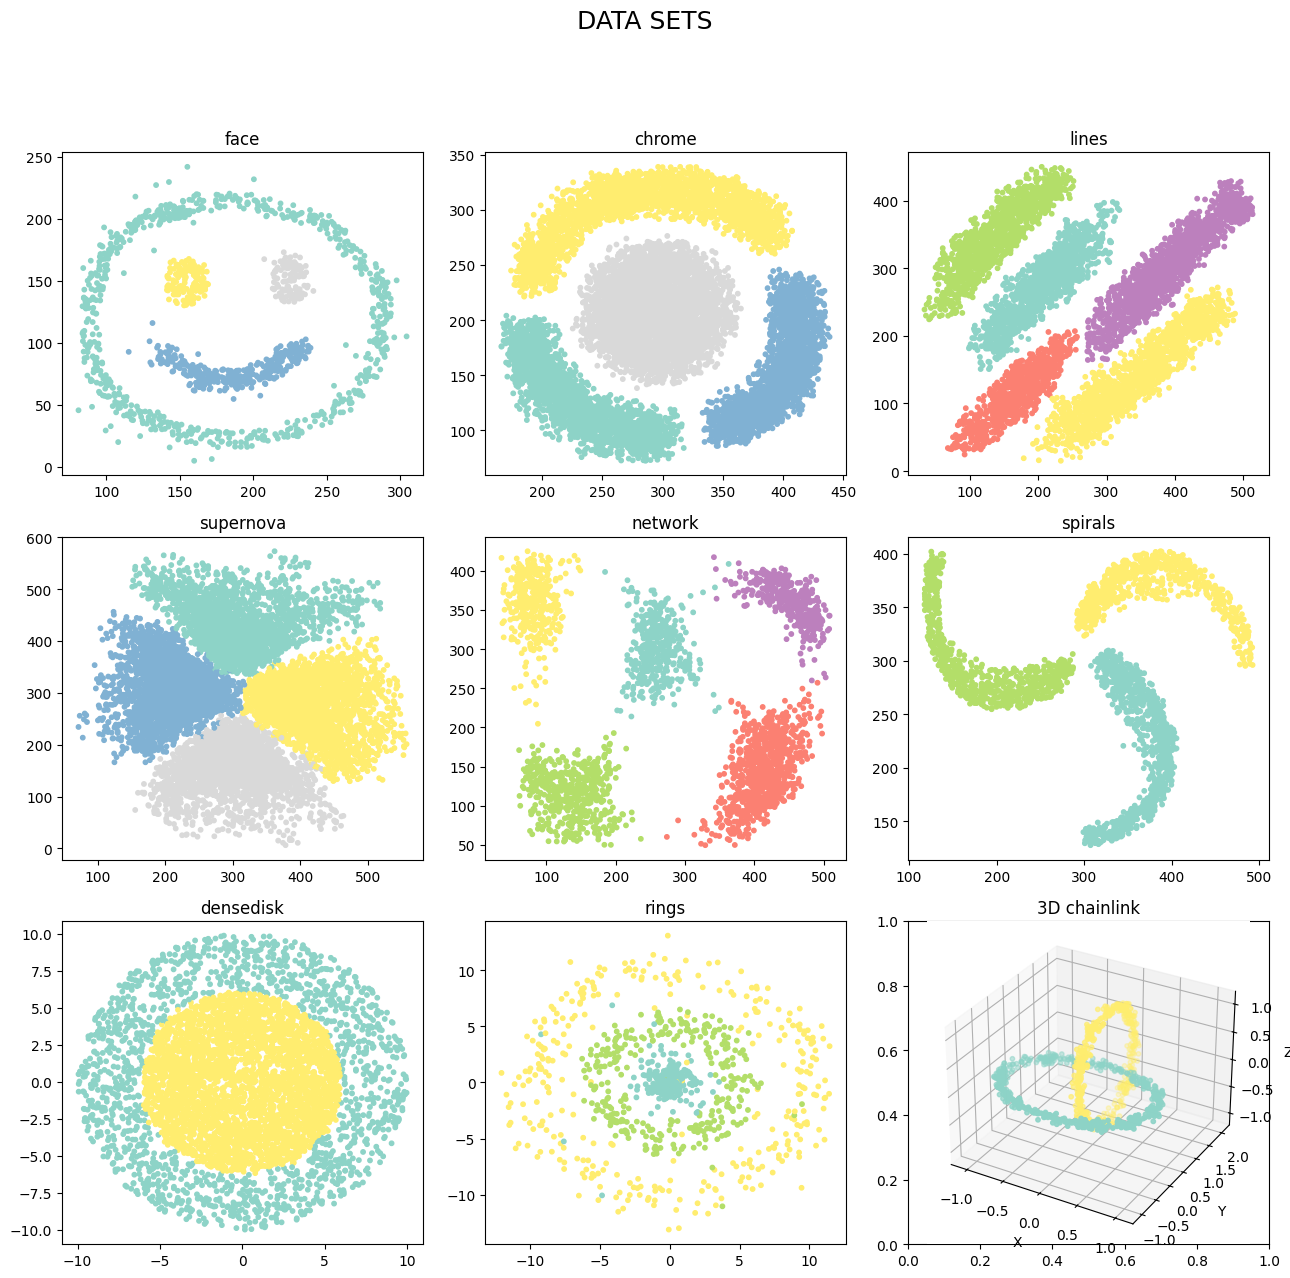

In [192]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [193]:
face_df_kmeans = face_df.copy()
chrome_df_kmeans = chrome_df.copy()
lines2_df_kmeans = lines2_df.copy()
supernova_df_kmeans = supernova_df.copy()
network_df_kmeans = network_df.copy()
spirals_df_kmeans = spirals_df.copy()
densedisk_df_kmeans = densedisk_df.copy()
rings_df_kmeans = rings_df.copy()
chainlink_df_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [194]:
face_df_kmeans.drop(['color'], axis =1 , inplace = True)
chrome_df_kmeans.drop(['color'], axis =1 , inplace = True)
lines2_df_kmeans.drop(['color'], axis =1 , inplace = True)
supernova_df_kmeans.drop(['color'], axis =1 , inplace = True)
network_df_kmeans.drop(['color'], axis =1 , inplace = True)
spirals_df_kmeans.drop(['color'], axis =1 , inplace = True)
densedisk_df_kmeans.drop(['color'], axis =1 , inplace = True)
rings_df_kmeans.drop(['color'], axis =1 , inplace = True)
chainlink_df_kmeans.drop(['color'], axis =1 , inplace = True)

3. Train a K-means model for each dataset.

In [195]:
kmeans_face = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_chrome = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_lines2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_supernova = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_network = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_spirals = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_densedisk = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_rings = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_chainlink = KMeans(n_clusters = 2, init = 'k-means++', random_state =42)

y_kmeans_face = kmeans_face.fit_predict(face_df_kmeans)
y_kmeans_chrome = kmeans_chrome.fit_predict(chrome_df_kmeans)
y_kmeans_lines2 = kmeans_lines2.fit_predict(lines2_df_kmeans)
y_kmeans_supernova = kmeans_supernova.fit_predict(supernova_df_kmeans)
y_kmeans_network = kmeans_network.fit_predict(network_df_kmeans)
y_kmeans_spirals = kmeans_spirals.fit_predict(spirals_df_kmeans)
y_kmeans_densedisk = kmeans_densedisk.fit_predict(densedisk_df_kmeans)
y_kmeans_rings = kmeans_rings.fit_predict(rings_df_kmeans)
y_kmeans_chainlink = kmeans_chainlink.fit_predict(chainlink_df_kmeans)

4. Add a "Cluster" column for each data set

In [196]:
face_df_kmeans['Cluster'] = y_kmeans_face
chrome_df_kmeans['Cluster'] = y_kmeans_chrome
lines2_df_kmeans['Cluster'] = y_kmeans_lines2
supernova_df_kmeans['Cluster'] = y_kmeans_supernova
network_df_kmeans['Cluster'] = y_kmeans_network
spirals_df_kmeans['Cluster'] = y_kmeans_spirals
densedisk_df_kmeans['Cluster'] = y_kmeans_densedisk
rings_df_kmeans['Cluster'] = y_kmeans_rings
chainlink_df_kmeans['Cluster'] = y_kmeans_chainlink

5. Plot the Correct cluster and the K-means cluster

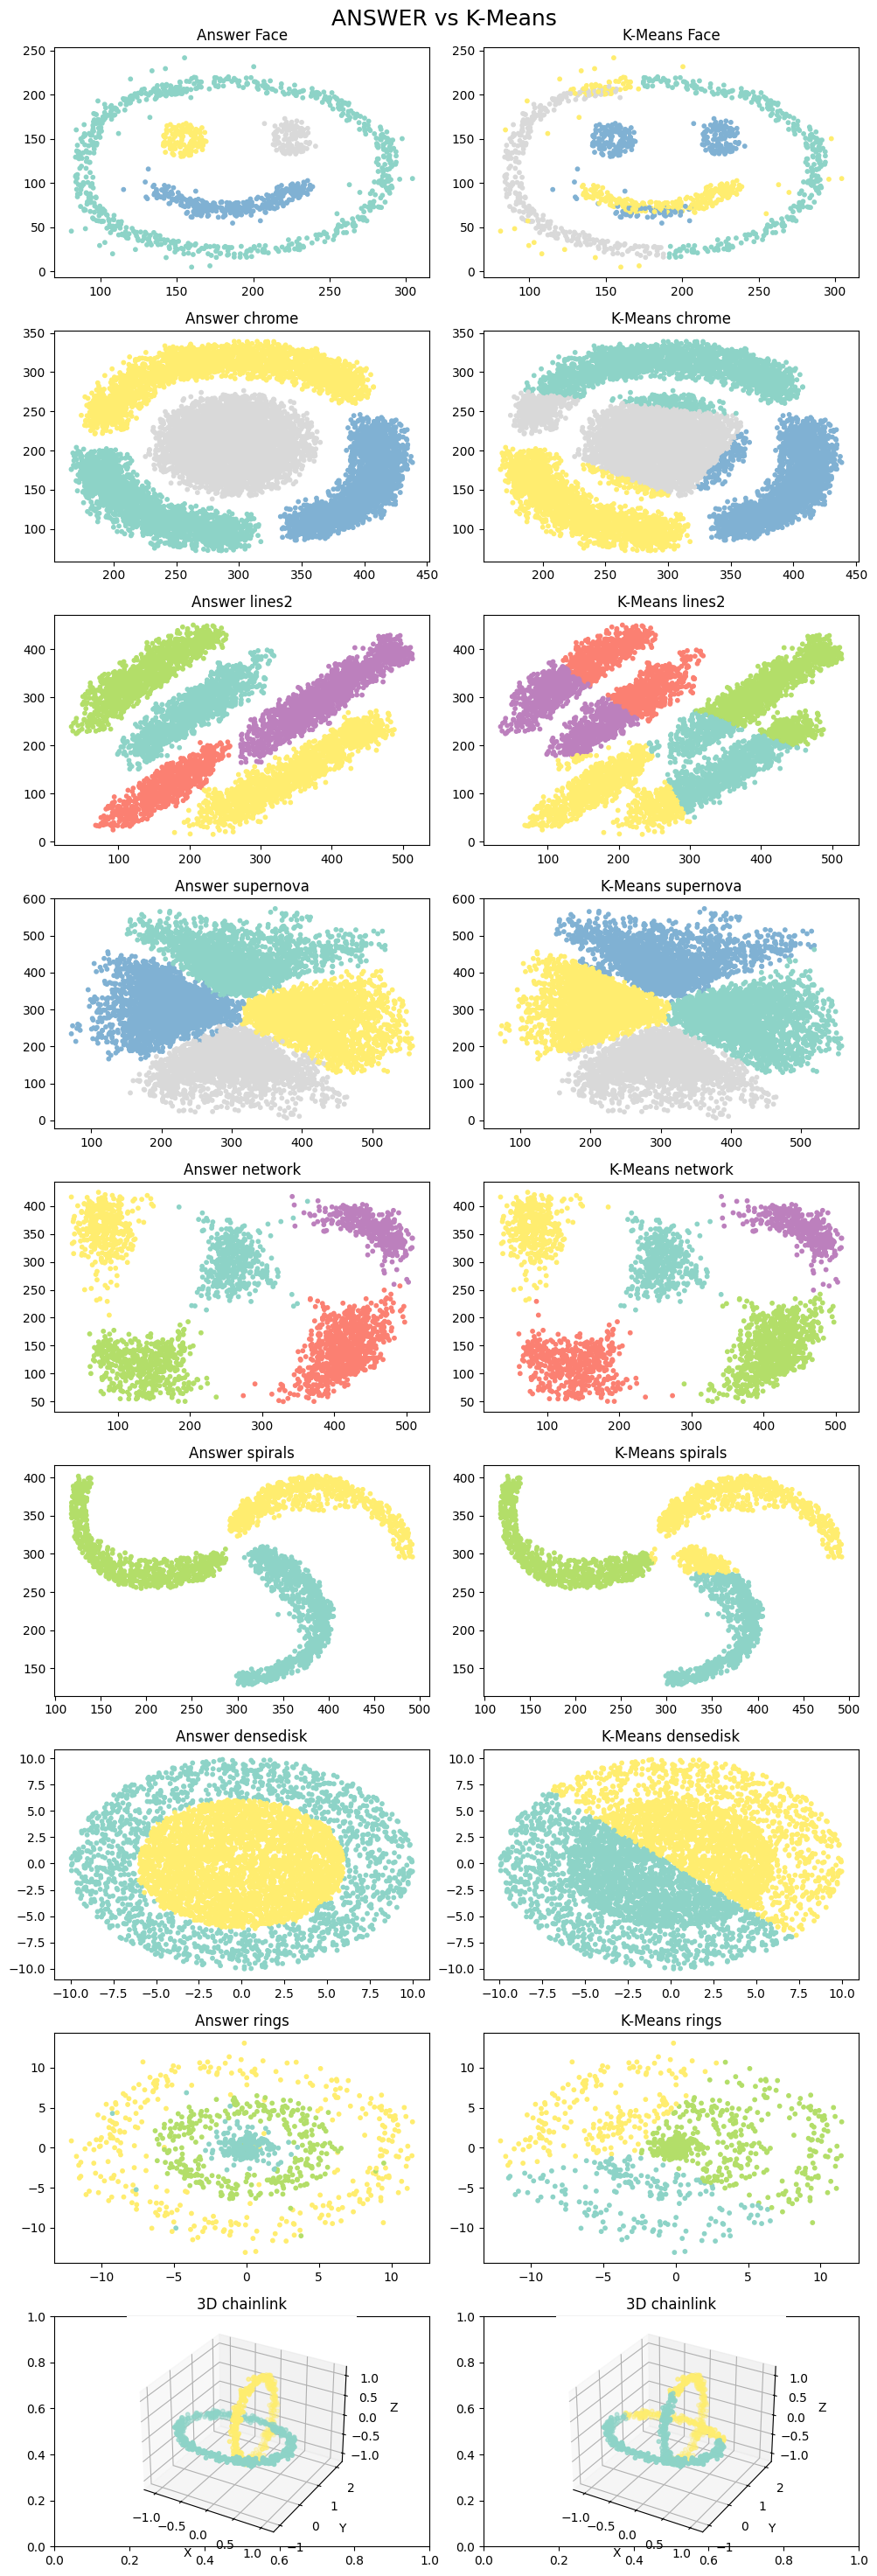

In [197]:
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(face_df_kmeans['x'], face_df_kmeans['y'], c=face_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_df_kmeans['x'], chrome_df_kmeans['y'], c=chrome_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_df_kmeans['x'], lines2_df_kmeans['y'], c=lines2_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_df_kmeans['x'], supernova_df_kmeans['y'], c=supernova_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_df_kmeans['x'], network_df_kmeans['y'], c=network_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_df_kmeans['x'], spirals_df_kmeans['y'], c=spirals_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means spirals");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_df_kmeans['x'], densedisk_df_kmeans['y'], c=densedisk_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("K-Means densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_df_kmeans['x'], rings_df_kmeans['y'], c=rings_df_kmeans['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("K-Means rings");

# Add a 3D plot
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_df_kmeans['x'], chainlink_df_kmeans['y'], chainlink_df_kmeans['z'], c=chainlink_df_kmeans['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [198]:
face_df_AgglomerativeC = face_df.copy()
chrome_df_AgglomerativeC = chrome_df.copy()
lines2_df_AgglomerativeC = lines2_df.copy()
supernova_df_AgglomerativeC = supernova_df.copy()
network_df_AgglomerativeC = network_df.copy()
spirals_df_AgglomerativeC = spirals_df.copy()
densedisk_df_AgglomerativeC = densedisk_df.copy()
rings_df_AgglomerativeC = rings_df.copy()
chainlink_df_AgglomerativeC = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [199]:
face_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
chrome_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
lines2_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
supernova_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
network_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
spirals_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
densedisk_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
rings_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)
chainlink_df_AgglomerativeC.drop(['color'], axis =1 , inplace = True)

3. Train a Agglomerative Clustering model for each dataset.

In [200]:
AgglomerativeC_face = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_chrome = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_lines2 = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_supernova = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
AgglomerativeC_network = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
AgglomerativeC_spirals = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_densedisk = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
AgglomerativeC_rings = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
AgglomerativeC_chainlink = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')

y_AgglomerativeC_face = AgglomerativeC_face.fit_predict(face_df_AgglomerativeC)
y_AgglomerativeC_chrome = AgglomerativeC_chrome.fit_predict(chrome_df_AgglomerativeC)
y_AgglomerativeC_lines2 = AgglomerativeC_lines2.fit_predict(lines2_df_AgglomerativeC)
y_AgglomerativeC_supernova = AgglomerativeC_supernova.fit_predict(supernova_df_AgglomerativeC)
y_AgglomerativeC_network = AgglomerativeC_network.fit_predict(network_df_AgglomerativeC)
y_AgglomerativeC_spirals = AgglomerativeC_spirals.fit_predict(spirals_df_AgglomerativeC)
y_AgglomerativeC_densedisk = AgglomerativeC_densedisk.fit_predict(densedisk_df_AgglomerativeC)
y_AgglomerativeC_rings = AgglomerativeC_rings.fit_predict(rings_df_AgglomerativeC)
y_AgglomerativeC_chainlink = AgglomerativeC_chainlink.fit_predict(chainlink_df_AgglomerativeC)

4. Add a "Cluster" column for each data set

In [201]:
face_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_face
chrome_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_chrome
lines2_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_lines2
supernova_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_supernova
network_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_network
spirals_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_spirals
densedisk_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_densedisk
rings_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_rings
chainlink_df_AgglomerativeC['Cluster'] = y_AgglomerativeC_chainlink

5. Plot the Correct cluster and the Agglomerative cluster

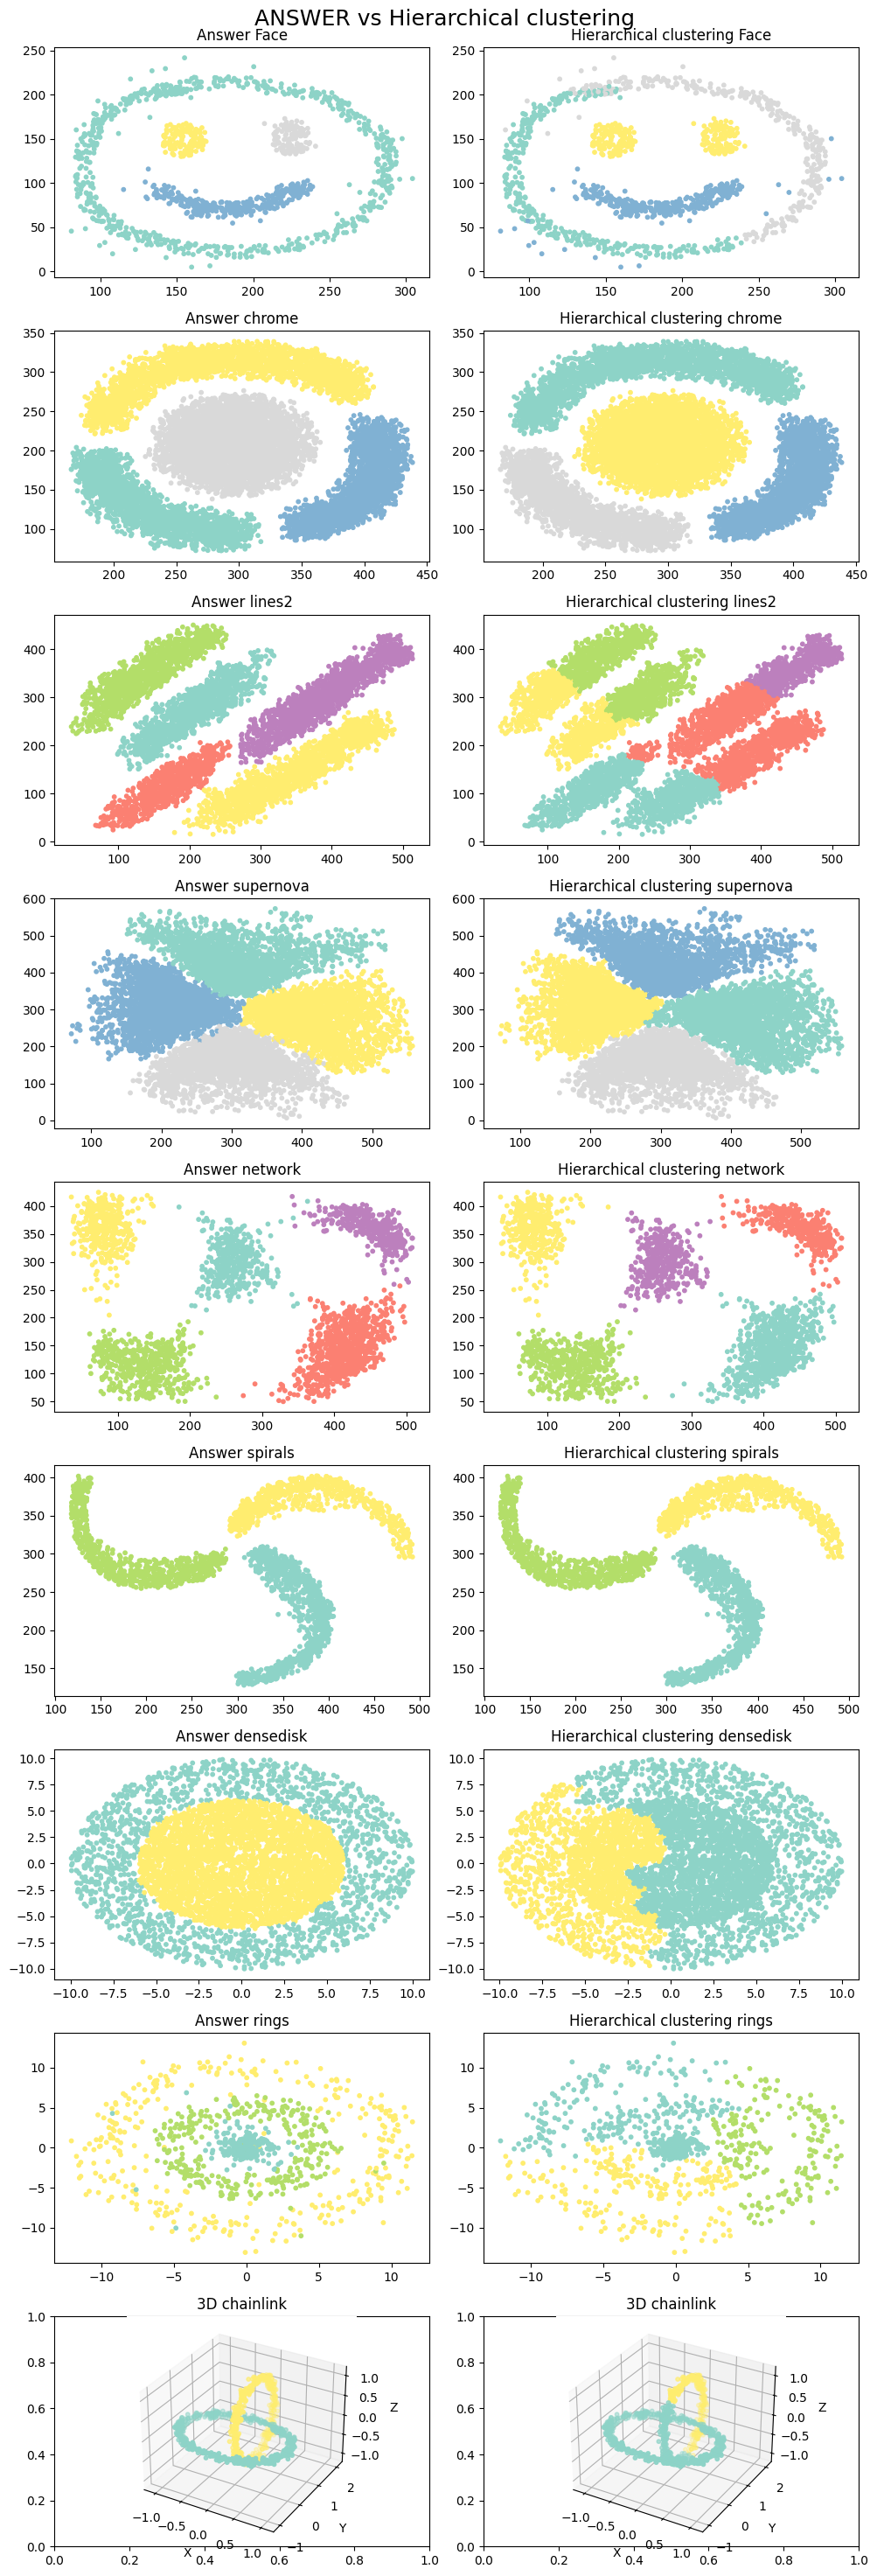

In [202]:
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs Hierarchical clustering\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(face_df_AgglomerativeC['x'], face_df_AgglomerativeC['y'], c=face_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("Hierarchical clustering Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_df_AgglomerativeC['x'], chrome_df_AgglomerativeC['y'], c=chrome_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("Hierarchical clustering chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_df_AgglomerativeC['x'], lines2_df_AgglomerativeC['y'], c=lines2_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("Hierarchical clustering lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_df_AgglomerativeC['x'], supernova_df_AgglomerativeC['y'], c=supernova_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("Hierarchical clustering supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_df_AgglomerativeC['x'], network_df_AgglomerativeC['y'], c=network_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("Hierarchical clustering network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_df_AgglomerativeC['x'], spirals_df_AgglomerativeC['y'], c=spirals_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("Hierarchical clustering spirals");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_df_AgglomerativeC['x'], densedisk_df_AgglomerativeC['y'], c=densedisk_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("Hierarchical clustering densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_df_AgglomerativeC['x'], rings_df_AgglomerativeC['y'], c=rings_df_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("Hierarchical clustering rings");

# Add a 3D plot
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_df_AgglomerativeC['x'], chainlink_df_AgglomerativeC['y'], chainlink_df_AgglomerativeC['z'], c=chainlink_df_AgglomerativeC['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [203]:
face_df_DBScan = face_df.copy()
chrome_df_DBScan  = chrome_df.copy()
lines2_df_DBScan  = lines2_df.copy()
supernova_df_DBScan  = supernova_df.copy()
network_df_DBScan  = network_df.copy()
spirals_df_DBScan  = spirals_df.copy()
densedisk_df_DBScan  = densedisk_df.copy()
rings_df_DBScan  = rings_df.copy()
chainlink_df_DBScan  = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [204]:
face_df_DBScan.drop(['color'], axis =1 , inplace = True)
chrome_df_DBScan.drop(['color'], axis =1 , inplace = True)
lines2_df_DBScan.drop(['color'], axis =1 , inplace = True)
supernova_df_DBScan.drop(['color'], axis =1 , inplace = True)
network_df_DBScan.drop(['color'], axis =1 , inplace = True)
spirals_df_DBScan.drop(['color'], axis =1 , inplace = True)
densedisk_df_DBScan.drop(['color'], axis =1 , inplace = True)
rings_df_DBScan.drop(['color'], axis =1 , inplace = True)
chainlink_df_DBScan.drop(['color'], axis =1 , inplace = True)

3. Train a DBSCAN Clustering model for each dataset.

In [216]:
DBScan_face = DBSCAN(eps=39, min_samples=50, metric='euclidean')#
DBScan_chrome = DBSCAN(eps=10, min_samples=5, metric='euclidean') #
DBScan_lines2 = DBSCAN(eps=10.2, min_samples=5, metric='euclidean')#
DBScan_supernova = DBSCAN(eps=11, min_samples=22, metric='euclidean')
DBScan_network = DBSCAN(eps=20, min_samples=4, metric='euclidean')#
DBScan_spirals = DBSCAN(eps=15, min_samples=5, metric='euclidean') #
DBScan_densedisk = DBSCAN(eps=0.80, min_samples=45, metric='euclidean')#
DBScan_rings = DBSCAN(eps=6, min_samples=4, metric='euclidean')
DBScan_chainlink = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')#

y_DBScan_face = DBScan_face.fit_predict(face_df_DBScan)
y_DBScan_chrome = DBScan_chrome.fit_predict(chrome_df_DBScan)
y_DBScan_lines2 = DBScan_lines2.fit_predict(lines2_df_DBScan)
y_DBScan_supernova = DBScan_supernova.fit_predict(supernova_df_DBScan)
y_DBScan_network = DBScan_network.fit_predict(network_df_DBScan)
y_DBScan_spirals = DBScan_spirals.fit_predict(spirals_df_DBScan)
y_DBScan_densedisk = DBScan_densedisk.fit_predict(densedisk_df_DBScan)
y_DBScan_rings = DBScan_rings.fit_predict(rings_df_DBScan)
y_DBScan_chainlink = DBScan_chainlink.fit_predict(chainlink_df_DBScan)

4. Add a "Cluster" column for each data set

In [217]:
face_df_DBScan['Cluster'] = y_DBScan_face
chrome_df_DBScan['Cluster'] = y_DBScan_chrome
lines2_df_DBScan['Cluster'] = y_DBScan_lines2
supernova_df_DBScan['Cluster'] = y_DBScan_supernova
network_df_DBScan['Cluster'] = y_DBScan_network
spirals_df_DBScan['Cluster'] = y_DBScan_spirals
densedisk_df_DBScan['Cluster'] = y_DBScan_densedisk
rings_df_DBScan['Cluster'] = y_DBScan_rings
chainlink_df_DBScan['Cluster'] = y_DBScan_chainlink

5. Plot the Correct cluster and the DBSCAN cluster

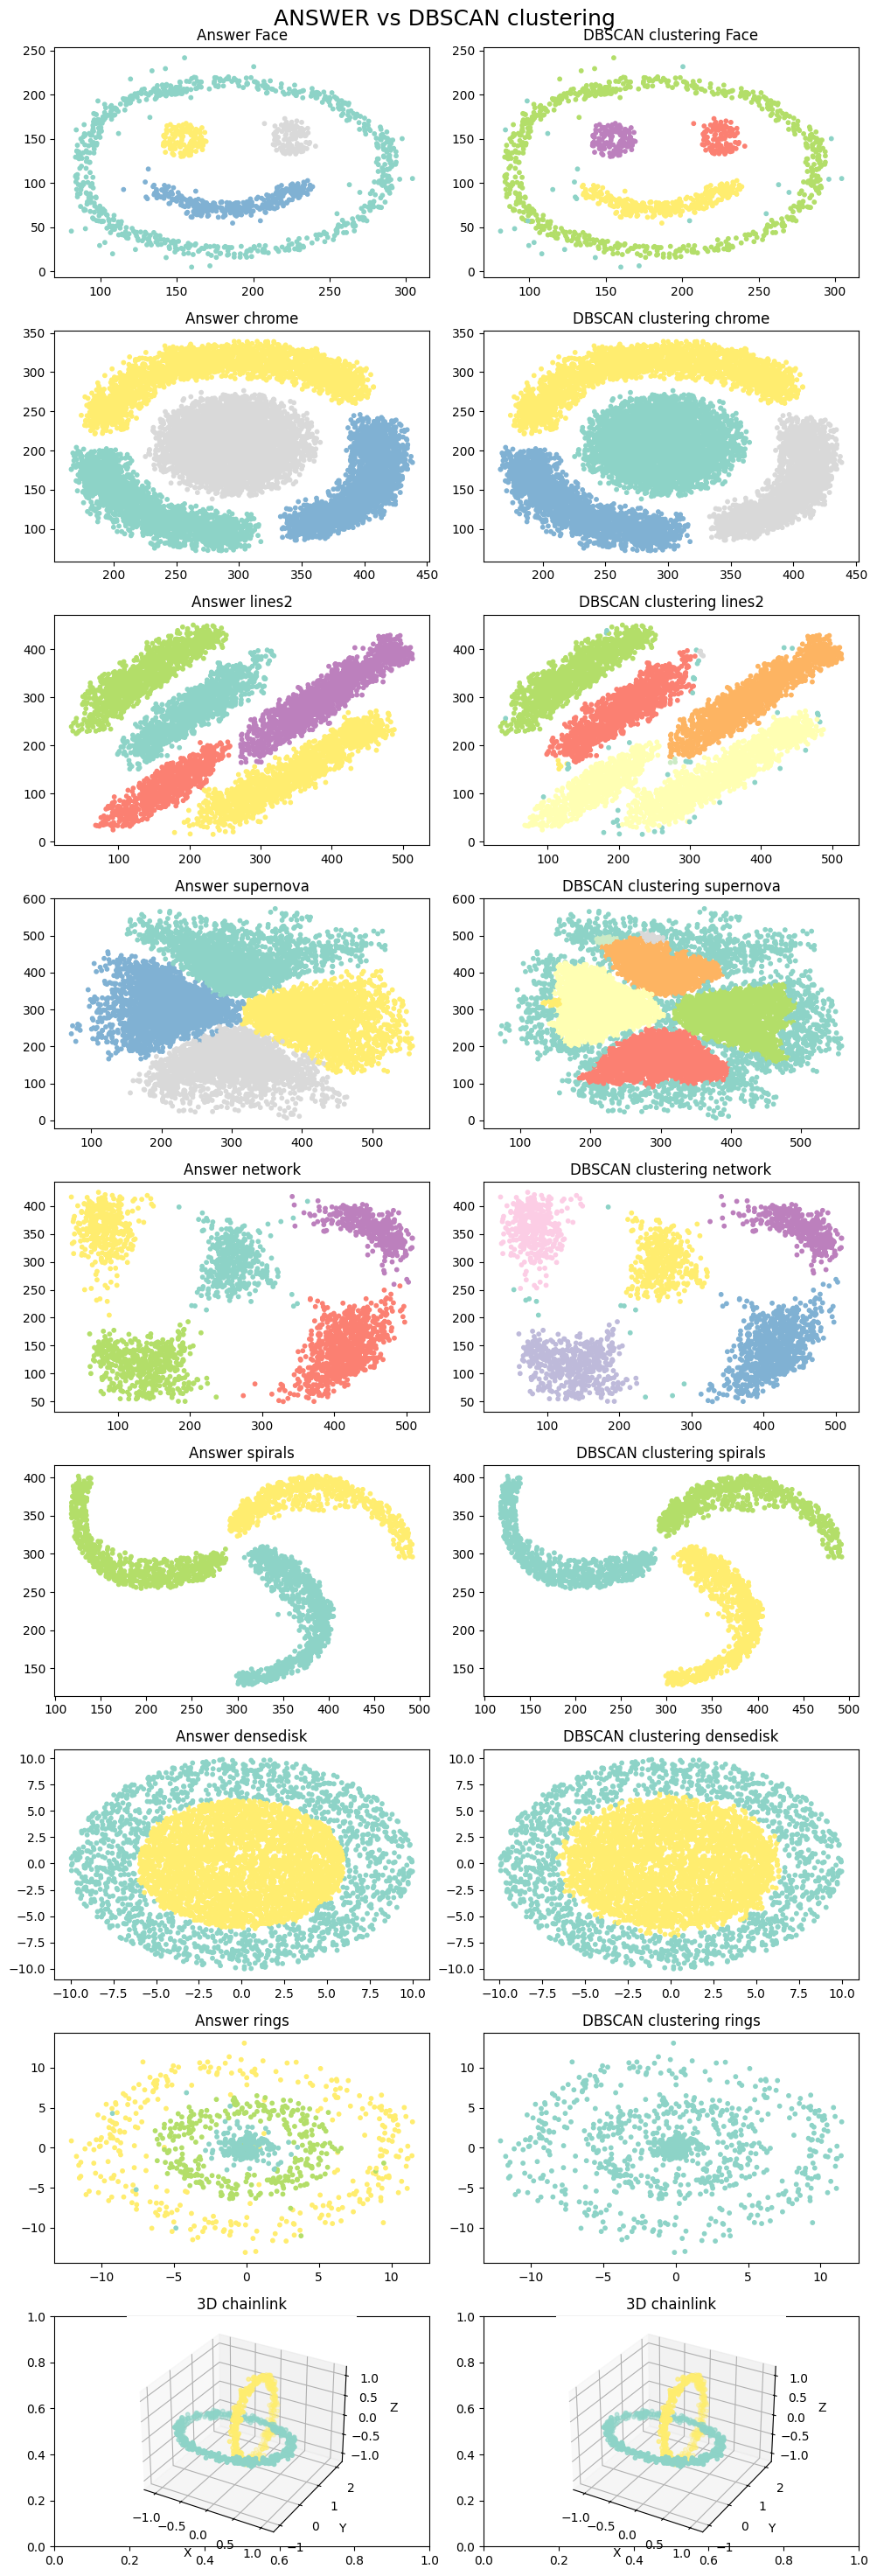

In [218]:
fig, axes = plt.subplots(nrows=9, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs DBSCAN clustering\n', size = 18)

axes[0,0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Face");
axes[0,1].scatter(face_df_DBScan['x'], face_df_DBScan['y'], c=face_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("DBSCAN clustering Face");

axes[1,0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer chrome");
axes[1,1].scatter(chrome_df_DBScan['x'], chrome_df_DBScan['y'], c=chrome_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("DBSCAN clustering chrome");

axes[2,0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer lines2");
axes[2,1].scatter(lines2_df_DBScan['x'], lines2_df_DBScan['y'], c=lines2_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("DBSCAN clustering lines2");

axes[3,0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer supernova");
axes[3,1].scatter(supernova_df_DBScan['x'], supernova_df_DBScan['y'], c=supernova_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("DBSCAN clustering supernova");

axes[4,0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer network");
axes[4,1].scatter(network_df_DBScan['x'], network_df_DBScan['y'], c=network_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("DBSCAN clustering network");

axes[5,0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer spirals");
axes[5,1].scatter(spirals_df_DBScan['x'], spirals_df_DBScan['y'], c=spirals_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("DBSCAN clustering spirals");

axes[6,0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap = "Set3")
axes[6,0].set_title("Answer densedisk");
axes[6,1].scatter(densedisk_df_DBScan['x'], densedisk_df_DBScan['y'], c=densedisk_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[6,1].set_title("DBSCAN clustering densedisk");

axes[7,0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap = "Set3")
axes[7,0].set_title("Answer rings");
axes[7,1].scatter(rings_df_DBScan['x'], rings_df_DBScan['y'], c=rings_df_DBScan['Cluster'], s=10, cmap = "Set3")
axes[7,1].set_title("DBSCAN clustering rings");

# Add a 3D plot
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_df_DBScan['x'], chainlink_df_DBScan['y'], chainlink_df_DBScan['z'], c=chainlink_df_DBScan['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.tight_layout()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

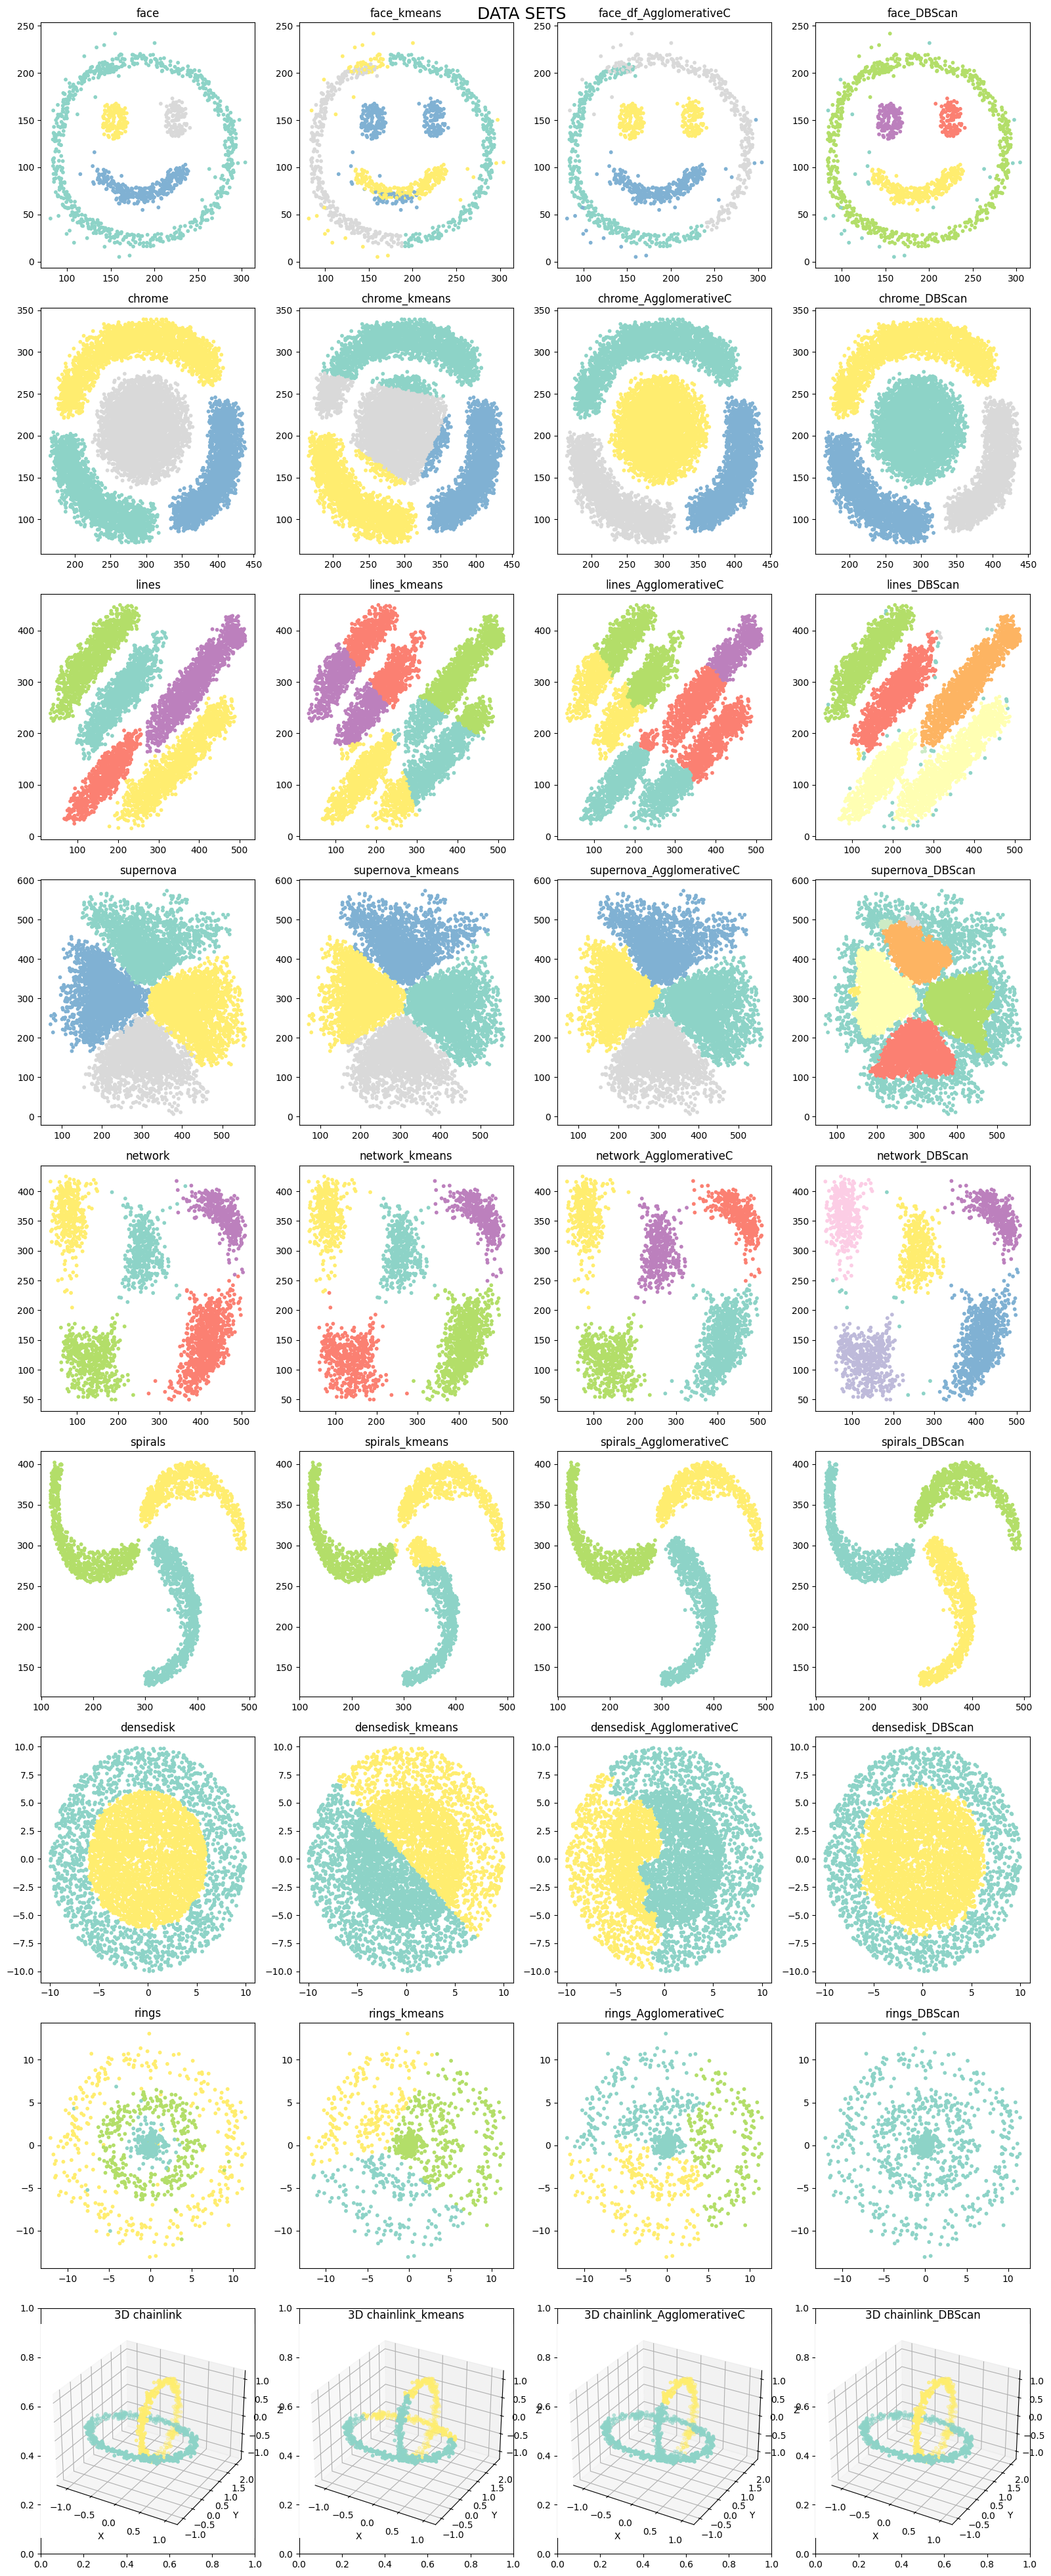

In [219]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(16, 40))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(face_df_kmeans['x'], face_df_kmeans['y'], c=face_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face_kmeans")
axes[0, 2].scatter(face_df_AgglomerativeC['x'], face_df_AgglomerativeC['y'], c=face_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[0, 2].set_title("face_df_AgglomerativeC")
axes[0, 3].scatter(face_df_DBScan['x'], face_df_DBScan['y'], c=face_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[0, 3].set_title("face_DBScan")

axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(chrome_df_kmeans['x'], chrome_df_kmeans['y'], c=chrome_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome_kmeans")
axes[1, 2].scatter(chrome_df_AgglomerativeC['x'], chrome_df_AgglomerativeC['y'], c=chrome_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[1, 2].set_title("chrome_AgglomerativeC")
axes[1, 3].scatter(chrome_df_DBScan['x'], chrome_df_DBScan['y'], c=chrome_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[1, 3].set_title("chrome_DBScan")

axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(lines2_df_kmeans['x'], lines2_df_kmeans['y'], c=lines2_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines_kmeans")
axes[2, 2].scatter(lines2_df_AgglomerativeC['x'], lines2_df_AgglomerativeC['y'], c=lines2_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[2, 2].set_title("lines_AgglomerativeC")
axes[2, 3].scatter(lines2_df_DBScan['x'], lines2_df_DBScan['y'], c=lines2_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[2, 3].set_title("lines_DBScan")

axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(supernova_df_kmeans['x'], supernova_df_kmeans['y'], c=supernova_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova_kmeans")
axes[3, 2].scatter(supernova_df_AgglomerativeC['x'], supernova_df_AgglomerativeC['y'], c=supernova_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[3, 2].set_title("supernova_AgglomerativeC")
axes[3, 3].scatter(supernova_df_DBScan['x'], supernova_df_DBScan['y'], c=supernova_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[3, 3].set_title("supernova_DBScan")

axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(network_df_kmeans['x'], network_df_kmeans['y'], c=network_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network_kmeans")
axes[4, 2].scatter(network_df_AgglomerativeC['x'], network_df_AgglomerativeC['y'], c=network_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[4, 2].set_title("network_AgglomerativeC")
axes[4, 3].scatter(network_df_DBScan['x'], network_df_DBScan['y'], c=network_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[4, 3].set_title("network_DBScan")

axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(spirals_df_kmeans['x'], spirals_df_kmeans['y'], c=spirals_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals_kmeans")
axes[5, 2].scatter(spirals_df_AgglomerativeC['x'], spirals_df_AgglomerativeC['y'], c=spirals_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[5, 2].set_title("spirals_AgglomerativeC")
axes[5, 3].scatter(spirals_df_DBScan['x'], spirals_df_DBScan['y'], c=spirals_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[5, 3].set_title("spirals_DBScan")

axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(densedisk_df_kmeans['x'], densedisk_df_kmeans['y'], c=densedisk_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk_kmeans")
axes[6, 2].scatter(densedisk_df_AgglomerativeC['x'], densedisk_df_AgglomerativeC['y'], c=densedisk_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[6, 2].set_title("densedisk_AgglomerativeC")
axes[6, 3].scatter(densedisk_df_DBScan['x'], densedisk_df_DBScan['y'], c=densedisk_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[6, 3].set_title("densedisk_DBScan")

axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(rings_df_kmeans['x'], rings_df_kmeans['y'], c=rings_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings_kmeans")
axes[7, 2].scatter(rings_df_AgglomerativeC['x'], rings_df_AgglomerativeC['y'], c=rings_df_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[7, 2].set_title("rings_AgglomerativeC")
axes[7, 3].scatter(rings_df_DBScan['x'], rings_df_DBScan['y'], c=rings_df_DBScan['Cluster'], s=10, cmap="Set3")
axes[7, 3].set_title("rings_DBScan")

# Add a 3D plot
ax3d = fig.add_subplot(9, 4, 33, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 34, projection='3d')
ax3d.scatter(chainlink_df_kmeans['x'], chainlink_df_kmeans['y'], chainlink_df_kmeans['z'], c=chainlink_df_kmeans['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_kmeans")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 35, projection='3d')
ax3d.scatter(chainlink_df_AgglomerativeC['x'], chainlink_df_AgglomerativeC['y'], chainlink_df_AgglomerativeC['z'], c=chainlink_df_AgglomerativeC['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_AgglomerativeC")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 36, projection='3d')
ax3d.scatter(chainlink_df_DBScan['x'], chainlink_df_DBScan['y'], chainlink_df_DBScan['z'], c=chainlink_df_DBScan['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_DBScan")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])